In [19]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

women_electors_filepath = "/content/drive/MyDrive/collab_datasets/23_Participation_Of_Women_Electors_In_Polls.csv"
women_candidates_filepath = "/content/drive/MyDrive/collab_datasets/24_Participation_of_Women_Candidates.csv"

women_electors_data = pd.read_csv(women_electors_filepath)
women_candidates_data = pd.read_csv(women_candidates_filepath)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
display(women_electors_data.head())
display(women_candidates_data.head())

,State/Ut,No Of Seats,Total Electors,General Electors,Total Women Electors Including Service Electors,% Of Women Electors Over Total Electors,Total Votes Polled,Total Votes Polled [Excluding Postal Votes],Total Votes Polled By Women [Excluding Postal Votes],% Of Votes Polled By Women [Excluding Postal Votes] Over Total Votes Polled (Excluding Postal Votes),% Of Women Voters Over Women Electors,Total Poll% In The State/Ut
0,Andhra Pradesh,25,41401887,41333702,21058615,50.86,33858957,33348275,16910755,50.71,80.30,81.78
1,Arunachal Pradesh,2,898442,892694,454359,50.57,728393,691003,360838,52.22,79.42,81.07
2,Assam,14,24572114,24506236,12245586,49.84,20118166,19991860,10006042,50.05,81.71,81.87
3,Bihar,40,77259579,77089931,36747831,47.56,43480859,43318981,21846962,50.43,59.45,56.28
4,Goa,2,1179644,1179344,607723,51.52,908178,896978,465881,51.94,76.66,76.99


,State /UT,Seats,Constituency Type,No. Of Women - Contestants,No. Of Women - Elected,No. Of Women - Deposits Forfeited,% of Elected Women - Over Total Women Candidates in the State,% of Elected Women - Over total seats in State/UT
0,Andhra Pradesh,20,GEN,31,2,26,5.26,8.0
1,Andhra Pradesh,4,SC,3,0,3,0.00,0.0
2,Andhra Pradesh,1,ST,4,1,2,2.63,4.0
3,Andhra Pradesh,25,State Total,38,3,31,7.89,12.0
4,Arunachal Pradesh,2,GEN,1,0,1,0.00,0.0


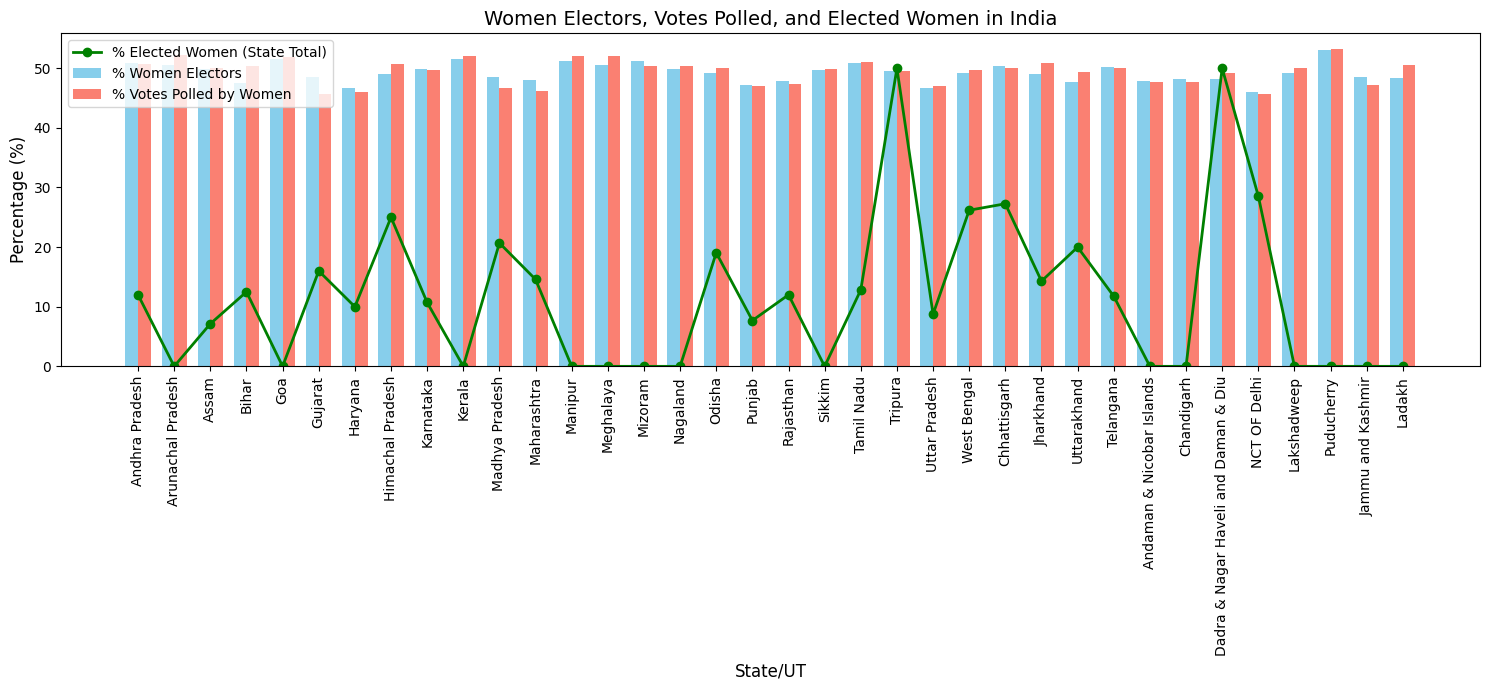

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter State Total rows from women_candidates_data
df2_state_total = women_candidates_data[women_candidates_data['Constituency Type'] == 'State Total']

# Inner merge on state name to keep only common states
merged_df = pd.merge(
    women_electors_data,
    df2_state_total[['State /UT', '% of Elected Women - Over total seats in State/UT']],
    left_on='State/Ut',
    right_on='State /UT',
    how='inner'  # 👈 only keep states present in both
)

# Bar chart values
states = merged_df['State/Ut']
women_electors_pct = merged_df['% Of Women Electors Over Total Electors']
women_votes_pct = merged_df['% Of Votes Polled By Women [Excluding Postal Votes] Over Total Votes Polled (Excluding Postal Votes)']

# Line chart values
elected_women_pct = merged_df['% of Elected Women - Over total seats in State/UT']

# Plot
plt.figure(figsize=(15, 7))
bar_width = 0.35
r1 = range(len(states))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, women_electors_pct, color='skyblue', width=bar_width, label='% Women Electors')
plt.bar(r2, women_votes_pct, color='salmon', width=bar_width, label='% Votes Polled by Women')

# Plot line
plt.plot([r + bar_width/2 for r in r1], elected_women_pct, color='green', marker='o', linewidth=2, label='% Elected Women (State Total)')

# Labels & title
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Women Electors, Votes Polled, and Elected Women in India', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(states))], states, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-1549329660.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['% Women Electors', '% Elected Women'], patch_artist=True,


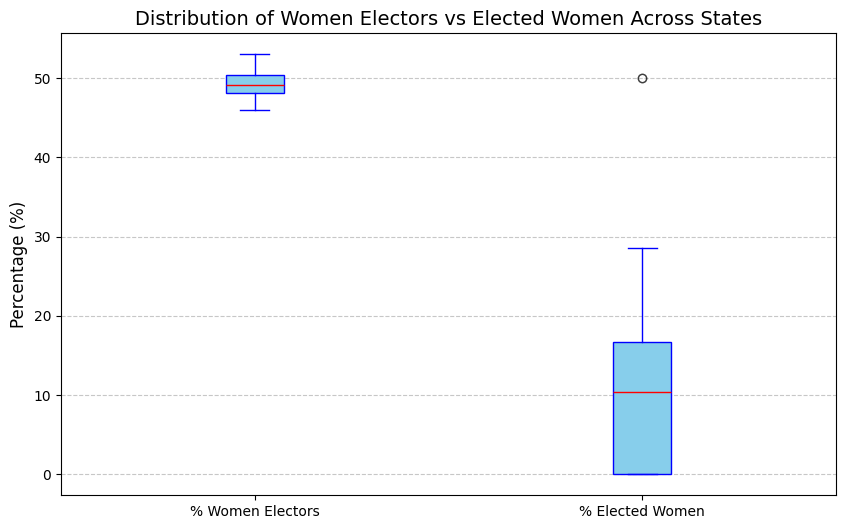

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter State Total rows from women_candidates_data
df2_state_total = women_candidates_data[women_candidates_data['Constituency Type'] == 'State Total']

# Inner merge to keep only states present in both datasets
merged_df = pd.merge(
    women_electors_data,
    df2_state_total[['State /UT', '% of Elected Women - Over total seats in State/UT']],
    left_on='State/Ut',
    right_on='State /UT',
    how='inner'
)

# Prepare data for box plot
data_to_plot = [
    merged_df['% Of Women Electors Over Total Electors'],
    merged_df['% of Elected Women - Over total seats in State/UT']
]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['% Women Electors', '% Elected Women'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='orange', alpha=0.5))

plt.title('Distribution of Women Electors vs Elected Women Across States', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


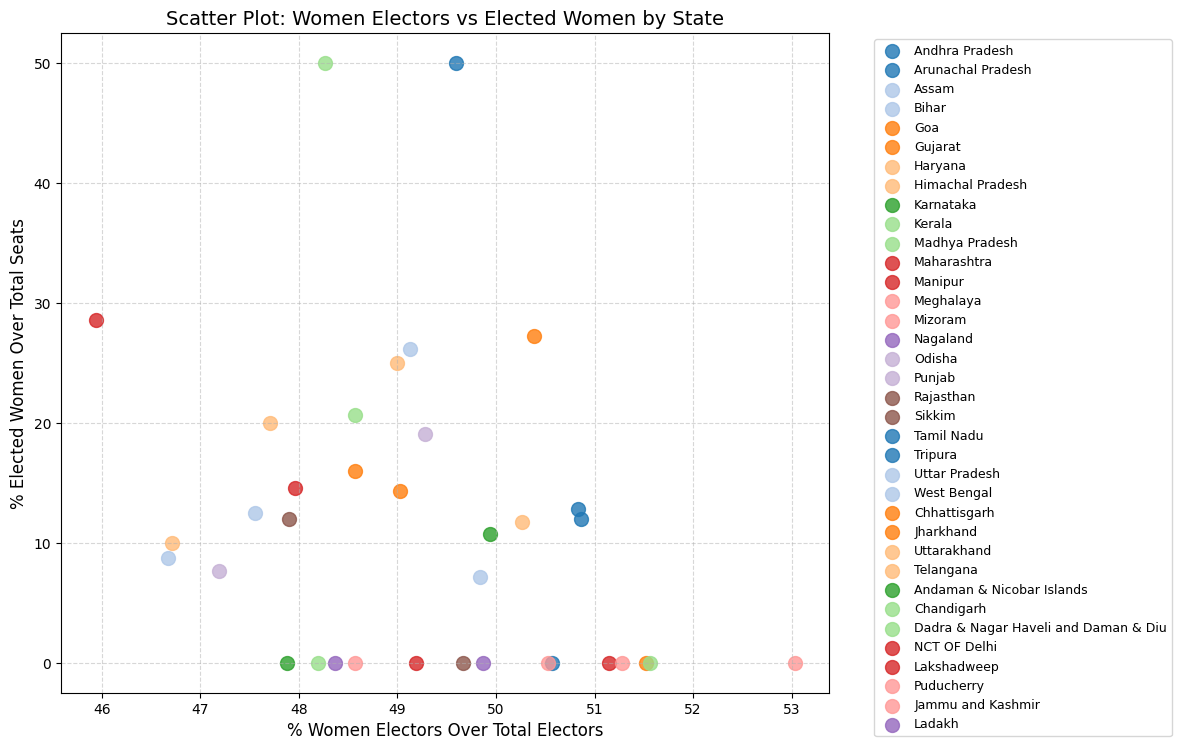

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter State Total rows from women_candidates_data
df2_state_total = women_candidates_data[women_candidates_data['Constituency Type'] == 'State Total']

# Inner merge to keep only states present in both datasets
merged_df = pd.merge(
    women_electors_data,
    df2_state_total[['State /UT', '% of Elected Women - Over total seats in State/UT']],
    left_on='State/Ut',
    right_on='State /UT',
    how='inner'
)

# Scatter plot: X = Women Electors %, Y = Elected Women %
plt.figure(figsize=(12, 8))

# Generate unique colors for each state
num_states = len(merged_df)
colors = plt.cm.tab20(np.linspace(0, 1, num_states))  # 20 unique colors, cycled if more than 20

# Plot each state individually to create legend
for i, state in enumerate(merged_df['State/Ut']):
    plt.scatter(
        merged_df['% Of Women Electors Over Total Electors'].iloc[i],
        merged_df['% of Elected Women - Over total seats in State/UT'].iloc[i],
        color=colors[i % 20],  # cycle colors if >20
        s=100,
        alpha=0.8,
        label=state
    )

plt.xlabel('% Women Electors Over Total Electors', fontsize=12)
plt.ylabel('% Elected Women Over Total Seats', fontsize=12)
plt.title('Scatter Plot: Women Electors vs Elected Women by State', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()
